# Numeros de punto flotante (floating point numbers)

## Motivacion:
$$(528.52)_{10} = 5 \times 10^2 + 2 \times 10^1 + 8 \times 10^0 + 5 \times 10^{-1} + 2 \times 10^{-2} $$

En general

$$(a_n a_{n-1} \cdots a_0 b_1 b_2 \cdots b_m)_{10} = a_n \times 10^n + a_{n-1} \times 10^{n-1} + \cdots + a_0 10^0 + b_1 \times 10^{-1} + b_2 \times 10^{-2} + \cdots + b_m \times 10^{-m}  $$


De igual forma:

$$(a_n a_{n-1} \cdots a_0 b_1 b_2 \cdots b_m)_{2} = a_n \times 2^n + a_{n-1} \times 2^{n-1} + \cdots + a_0 2^0 + b_1 \times 2^{-1} + b_2 \times 2^{-2} + \cdots + b_m \times 2^{-m}  $$







## Concepto de precision computacional (round off error)
Supongamos que solo tenemos 4 bits y queremos representar el numero 0.1. Que precision tenemos para eso?


$$0.1  = b_1 2^{-1} + b_2 2^{-2} + b_3 2^{-3} + b_4 2^{-4} $$

El numero mas pequeno de esta secuencia es $b_1=b_2=b_3=0$ , $b_4=1$. En este caso es

$2^{-4}=1/16 = 0.0625 < 0.1$. 

El proximo mas pequeno. $b_1=0, b_2=0, b_3=1, b_4=0$.
Representa

$2^{-3}=1/8 = 0.125 > 0.1$

In [6]:
# Error or exceso
0.125-0.1



0.024999999999999994

In [7]:
# Error por defecto
0.1-0.0625

0.037500000000000006

### Ejemplo en Python que muestra que numericamente para el computador $0.1+ 0.2 \ne 0.3$.

In [8]:
a=0.1
b=0.2
esperado = 0.3
a+b == esperado

False

In [12]:
c=a+b
print("a + b = %.4f\n" %(c))

a + b = 0.3000



In [14]:
print("a = %.25f\n" %(a))
print("b = %.25f\n" %(b))
print("c = %.25f\n" %(c))
print("error= %.25f\n" %(esperado-c))


a = 0.1000000000000000055511151

b = 0.2000000000000000111022302

c = 0.3000000000000000444089210

error= -0.0000000000000000555111512



Para entender lo que pasa aca, vamos a estudiar la representacion de $0.1$ en el computador. Para esto acudimos al metodo de **multiplicaciones suscesivas** . Explicado en el apendice de las notas.

Como convertimos $0.1$ a base 2?

Algoritmo:

\begin{eqnarray} 0.1 \times 2 &=& 0.2 \quad \text{la parte entera es 0} \\
0.2 \times 2 &=& 0.4 \quad \text{parte entera es 0} \\
0.4 \times 2 &=& 0.8 \quad \text{la parte enera es 0} \\
0.8 \times 2 &=& 1.6 \quad \text{la parte entera es 1} \\
0.6 \times 2 &=& 1.2 \quad \text{ la parte entera es 1} 
\end{eqnarray} 

El numero binario es las partes enteras en el orden de arriba a abajo.

$$ 00011 0011 0011 \cdots = 0 \overline{0011}$$

## Representacion IEEE.
De la misma forma que un numero en base 10 tiene una representacion cientifica, haremos con un numero en base 2.

Por ejemplo

$$ 85 = 8.5 \times 10^1 = 8.5 E01$$

Son 64 bits. Los vamos a dividir en 3 grupos:

* Signo (es el primer bit)
* Caracteristica (exponente). Los siguentes 11 bits
* Mantisa, los siguientes 52 bits

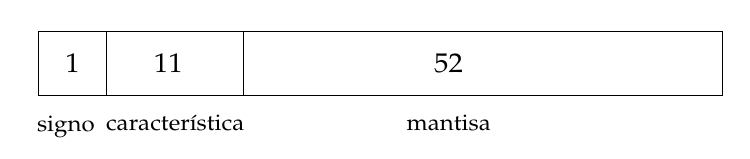

En base dos la notacion "cientifica" requiere que el primer bit (no el signo) es 1.

Escribamos 1.57 en base 2, da $1.1001...$,
En forma cientifica tenemos 1 + 1.001...$

Ahora para $0.1$ en base 2 
$0.1 = 0001100...$, en forma cientifica,

$1.100 \times 2^{-4}$


La representacion de un numero de punto flotante en el formato IEEE es

$$(-1)^s (1 + f) \times 2^{c-1023} $$

$c$ es la caracteristica (exponente). Por que $-1023$?

Ejemplo de conversion de binario a decimal usando IEEE.

$$0100000010001001110 \cdots 0$$.

* El signo. $-1^0=1$ es $+$.
* La caracteristica: $10000001000$. Que numero es este?
$c=1032$. De aca, la contribucion del exponente es $2^{c-1023}=2^9$. 

* La mantisa. La parte fraccionaria correspondiente a:

$$1001110 \cdots 0 $$

$$ f = 1 \times \frac12 + 0 \times \left ( \frac12\right )^2 +  0 \times \left ( \frac12\right )^3 + 1 \times \left ( \frac12\right )^4 + 1  \times \left ( \frac12\right )^5 + 1  \times \left ( \frac12\right )^6 + 0 \times \left ( \frac12 \right )^7 + \cdots + 0 \times  \left ( \frac12 \right )^{52} = 0.609375$$






El numero buscado es:

$$n =  +2^9 \times (1 + f) = 2^9 \times (1 + 0.609375)= 2^9 \times 1.609375 = 824$$

El **epsilon** de la maquina es $2^{-52}$ por que el ultimo bit de la mantisa es el bit 52.


Calculo rapido

$$2^{-52} = 2^{-50} \times 2^{-2} = (2^{10})^{-5}/4 \approx (10^3)^{-5}/4 = 10^{-15}/4 $$

### El numero mas grande:
El exponente mas grande es $c=2048-1023=1025$,
El $f$ mas grande $f=1-2^{-52}$ = 0.9999999999999998$

El numero mas grande seria

$$+2^{1025} \times (1 - 2^{-52}) = 3.59 \times 10^308 $$

In [15]:
1-2**(-52)

0.9999999999999998